In [4]:
import sys
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from utils import *
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

sys.path.append(os.path.abspath(os.path.join('..')))

def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    num_corpus_words = 0

    # ### START CODE HERE ###
    # Flatten all words from all sentences into one list
    flattened_words = []
    for sentence in corpus:
        for word in sentence:
            flattened_words.append(word)

    # Get unique words using set
    corpus_words = set(flattened_words)
    num_corpus_words = len(corpus_words)
    # ### END CODE HERE ###

    return corpus_words, num_corpus_words

In [28]:
corpus = [["all", "is", "well"], ["all", "that", "glitters", "is", "not", "gold"]]
words, num = distinct_words(corpus)
print("Words:", words)
print("Number of distinct words:", num)


Words: {'well', 'gold', 'that', 'is', 'not', 'all', 'glitters'}
Number of distinct words: 7


In [5]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4). """
    
    # Get sorted unique words and their count
    words, num_words = distinct_words(corpus)
    
    # Create word to index mapping (for rows/cols in matrix)
    word2Ind = {word: i for i, word in enumerate(words)}
    
    # Initialize square matrix of size (vocab_size x vocab_size) with zeros
    M = np.zeros((num_words, num_words))

    # Loop over each sentence in the corpus
    for sentence in corpus:
        for i, center_word in enumerate(sentence):
            center_idx = word2Ind[center_word]

            # Define the context window range
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)

            # Loop over context words
            for j in range(start, end):
                if i == j:
                    continue  # Skip the center word itself

                context_word = sentence[j]
                context_idx = word2Ind[context_word]
                
                # Increment the co-occurrence count
                M[center_idx][context_idx] += 1

    return M, word2Ind


In [6]:
corpus = [["all", "that", "glitters", "is", "not", "gold"],
          ["all", "is", "well", "that", "ends", "well"]]

M, word2Ind = compute_co_occurrence_matrix(corpus, window_size=2)

print("word2Ind mapping:")
for word, idx in word2Ind.items():
    print(f"{word:10} => {idx}")

print("\nCo-occurrence matrix:")
import pandas as pd
df = pd.DataFrame(M, index=word2Ind.keys(), columns=word2Ind.keys())
 # Rounded for easier reading


word2Ind mapping:
all        => 0
ends       => 1
is         => 2
well       => 3
gold       => 4
glitters   => 5
not        => 6
that       => 7

Co-occurrence matrix:


,all,ends,is,well,gold,glitters,not,that
all,0,0,1,1,0,1,0,1
ends,0,0,0,2,0,0,0,1
is,1,0,0,1,1,1,1,2
well,1,2,1,0,0,0,0,2
gold,0,0,1,0,0,0,1,0
glitters,1,0,1,0,0,0,1,1
not,0,0,1,0,1,1,0,0
that,1,1,2,2,0,1,0,0


In [7]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurrence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using Truncated SVD from scikit-learn.
    """
    np.random.seed(4355)
    n_iter = 10
    print("Running Truncated SVD over %i words..." % (M.shape[0]))

    ### START CODE HERE ###
    svd = TruncatedSVD(n_components=k, n_iter=n_iter)
    M_reduced = svd.fit_transform(M)
    ### END CODE HERE ###

    print("Done.")
    return M_reduced


Running Truncated SVD over 8185 words...
Done.


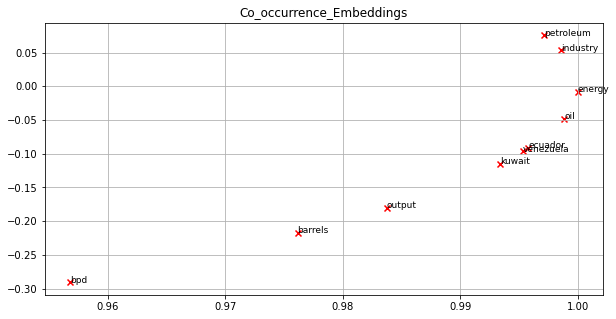

In [25]:
%matplotlib inline
def main():
    plt.rcParams['figure.figsize'] = [10, 5]

    assert sys.version_info[0] == 3
    assert sys.version_info[1] >= 5

    def plot_embeddings(M_reduced, word2Ind, words, title):
        for word in words:
            idx = word2Ind[word]
            x = M_reduced[idx, 0]
            y = M_reduced[idx, 1]
            plt.scatter(x, y, marker='x', color='red')
            plt.text(x, y, word, fontsize=9)
        plt.title(title)
        plt.grid(True)
        plt.show()  # ✅ THIS SHOWS IT INLINE

    #Read in the corpus
    reuters_corpus = read_corpus()

    M_co_occurrence, word2Ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)
    M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)
    # Rescale (normalize) the rows to make them each of unit-length
    M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
    M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

    words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']
    plot_embeddings(M_normalized, word2Ind_co_occurrence, words, "Co_occurrence_Embeddings.png")
    

if __name__ == "__main__":
    main()


In [9]:
grader.py

NameError: name 'grader' is not defined